## **Data Visualization/Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Please upload both train and test datasets at this step**

In [ ]:
from google.colab import files
 
print("Please upload both test and train datasets!")
uploaded = files.upload()
 
for file in uploaded.keys():
  print("You uploaded file {}".format(file))

Please upload both test and train datasets!


Saving test.csv to test.csv
Saving Train.csv to Train.csv
You uploaded file test.csv
You uploaded file Train.csv


In [ ]:
traindf = pd.read_csv('Train.csv')
testdf = pd.read_csv('test.csv')
display(traindf)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
print(traindf.dtypes)

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

Conclusions:
* A lot of the columns are of non-numeric datatype
* Cannot ignore all of them since some might be important

Before deciding on which to keep, I will see whether any of the columns have null values

In [ ]:
#checking for null values and diversity in the training dataset
for col in traindf.columns.values:
  listuniq = pd.unique(traindf[col])
  print("The number of unique elements in "+str(col) + " is "+ str(len(listuniq)) + " and the number of null values is/are: " + str(traindf[col].isnull().sum()))
  if(len(listuniq)<10): 
    print("And the elements are like "+str(listuniq))

The number of unique elements in id is 44550 and the number of null values is/are: 0
The number of unique elements in amount_tsh is 85 and the number of null values is/are: 0
The number of unique elements in date_recorded is 346 and the number of null values is/are: 0
The number of unique elements in funder is 1652 and the number of null values is/are: 2793
The number of unique elements in gps_height is 2396 and the number of null values is/are: 0
The number of unique elements in installer is 1855 and the number of null values is/are: 2807
The number of unique elements in longitude is 43155 and the number of null values is/are: 0
The number of unique elements in latitude is 43155 and the number of null values is/are: 0
The number of unique elements in wpt_name is 28991 and the number of null values is/are: 0
The number of unique elements in num_private is 59 and the number of null values is/are: 0
The number of unique elements in basin is 9 and the number of null values is/are: 0
And t

In [ ]:
#checking for null values and diversity in testing dataset
for col in testdf.columns.values:
  listuniq = pd.unique(testdf[col])
  print("The number of unique elements in "+str(col) + " is "+ str(len(listuniq)) + " and the number of null values is/are: " + str(testdf[col].isnull().sum()))
  if(len(listuniq)<10): 
    print("And the elements are like "+str(listuniq))

The number of unique elements in Unnamed: 0 is 14850 and the number of null values is/are: 0
The number of unique elements in id is 14850 and the number of null values is/are: 0
The number of unique elements in amount_tsh is 74 and the number of null values is/are: 0
The number of unique elements in date_recorded is 326 and the number of null values is/are: 0
The number of unique elements in funder is 948 and the number of null values is/are: 842
The number of unique elements in gps_height is 2128 and the number of null values is/are: 0
The number of unique elements in installer is 1085 and the number of null values is/are: 848
The number of unique elements in longitude is 14390 and the number of null values is/are: 0
The number of unique elements in latitude is 14390 and the number of null values is/are: 0
The number of unique elements in wpt_name is 10708 and the number of null values is/are: 0
The number of unique elements in num_private is 38 and the number of null values is/are: 0

In [ ]:
#checking if any column has less than 2000 NULL values
for col in traindf.columns.values:
  if(traindf[col].isnull().sum()<2000 and traindf[col].isnull().sum() !=0):
    print(str(col)+' has null values '+str(traindf[col].isnull().sum()))

subvillage has null values 287


'subvillage' might not be very important while assessing performance of water pumps.
Hence, I am willing to drop it anyway. 
So I will be dropping all the columns with NULL values

In [ ]:
#dropping columns
traindf = traindf.dropna(axis = 'columns')
testdf = testdf.dropna(axis = 'columns')
display(traindf)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,1203,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,GeoData Consultants Ltd,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,1409,34.615481,-9.972601,none,0,Lake Nyasa,Iringa,11,5,Ludewa,Luana,70,GeoData Consultants Ltd,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,1572,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Arusha,2,2,Arusha Rural,Kimnyaki,150,GeoData Consultants Ltd,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,0,33.628025,-8.860795,Mwanzechele,0,Rufiji,Mbeya,12,2,Mbeya Rural,Inyala,0,GeoData Consultants Ltd,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,1283,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Kilimanjaro,3,2,Mwanga,Shinghatini,34,GeoData Consultants Ltd,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,0,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Shinyanga,17,3,Kahama,Segese,0,GeoData Consultants Ltd,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,0,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Kagera,18,8,Chato,Katende,0,GeoData Consultants Ltd,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,969,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Ruvuma,10,3,Mbinga,Kigonsera,60,GeoData Consultants Ltd,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,1269,37.886287,-4.390882,Miembeni,0,Pangani,Kilimanjaro,3,3,Same,Suji,80,GeoData Consultants Ltd,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
#checking if the same columns have been dropped
set(traindf.columns.values).symmetric_difference(testdf.columns.values)

{'Unnamed: 0', 'status_group'}

In [ ]:
testdf = testdf.drop(columns='Unnamed: 0')
testdf.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,21215,0.0,2011-02-25,1676,35.247289,-8.113243,none,0,Rufiji,Iringa,11,1,Iringa Rural,Wasa,769,GeoData Consultants Ltd,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,25893,0.0,2011-04-17,0,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Dodoma,1,1,Kondoa,Chandama,0,GeoData Consultants Ltd,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,15713,0.0,2011-03-27,0,36.363337,-7.297600,Uganda,0,Rufiji,Dodoma,1,1,Mpwapwa,Ipera,0,GeoData Consultants Ltd,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,17247,0.0,2011-07-14,0,31.496315,-2.167140,Kakindo,0,Lake Victoria,Kagera,18,3,Muleba,Kyebitembe,0,GeoData Consultants Ltd,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,1248,0.0,2011-07-31,0,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Kagera,18,2,Bukoba Rural,Nyakato,0,GeoData Consultants Ltd,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


I have made the statistical decision of dropping columns. Next, I have to make the logical decision of dropping columns.

In [ ]:
#remaining columns with diversity
for col in traindf.columns.values:
  listuniq = pd.unique(traindf[col])
  print("The number of unique elements in "+str(col) + " is "+ str(len(listuniq)))
  if(len(listuniq)<20): 
    print("And the elements are like "+str(listuniq))

The number of unique elements in id is 44550
The number of unique elements in amount_tsh is 85
The number of unique elements in date_recorded is 346
The number of unique elements in gps_height is 2396
The number of unique elements in longitude is 43155
The number of unique elements in latitude is 43155
The number of unique elements in wpt_name is 28991
The number of unique elements in num_private is 59
The number of unique elements in basin is 9
And the elements are like ['Pangani' 'Lake Nyasa' 'Rufiji' 'Lake Tanganyika' 'Lake Victoria'
 'Wami / Ruvu' 'Internal' 'Ruvuma / Southern Coast' 'Lake Rukwa']
The number of unique elements in region is 21
The number of unique elements in region_code is 27
The number of unique elements in district_code is 20
The number of unique elements in lga is 125
The number of unique elements in ward is 2080
The number of unique elements in population is 956
The number of unique elements in recorded_by is 1
And the elements are like ['GeoData Consultants Lt

In [ ]:
#keeping only those columns which are needed to make decisions
traindf = traindf[['amount_tsh', 'date_recorded', 'population','gps_height', 'longitude', 'latitude', 'basin', 'construction_year', 'extraction_type_class', 'management_group',
         'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group', 'status_group']]
testdf = testdf[['amount_tsh', 'date_recorded', 'population', 'gps_height', 'longitude', 'latitude', 'basin', 'construction_year', 'extraction_type_class', 'management_group',
         'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group']]
traindf.head()

,amount_tsh,date_recorded,population,gps_height,longitude,latitude,basin,construction_year,extraction_type_class,management_group,quality_group,quantity_group,source_type,waterpoint_type_group,status_group
0,7.0,2013-03-20,90,1203,37.228664,-3.256505,Pangani,2008,gravity,user-group,good,enough,spring,communal standpipe,functional
1,0.0,2011-02-21,70,1409,34.615481,-9.972601,Lake Nyasa,1984,gravity,commercial,good,enough,spring,communal standpipe,functional
2,0.0,2013-01-04,150,1572,36.658778,-3.321529,Pangani,2002,gravity,user-group,good,insufficient,spring,communal standpipe,non functional
3,0.0,2011-04-03,0,0,33.628025,-8.860795,Rufiji,0,gravity,user-group,good,insufficient,river/lake,communal standpipe,functional
4,300.0,2013-03-08,34,1283,37.655509,-3.669777,Pangani,2007,gravity,user-group,good,insufficient,spring,communal standpipe,functional


There are quite a few 0 values in the dataset

In [ ]:
#for amount_tsh
counter=0
for i in range(0,44550):
  if traindf['amount_tsh'][i]==0.0:
    counter+=1
print(counter)

31231


Too many '0' values,  I will be dropping this column

In [ ]:
traindf = traindf.drop(columns=['amount_tsh'])
testdf = testdf.drop(columns=['amount_tsh'])
#construction year has 0 values too but I am claiming that it is an important parameter
testdf

,date_recorded,population,gps_height,longitude,latitude,basin,construction_year,extraction_type_class,management_group,quality_group,quantity_group,source_type,waterpoint_type_group
0,2011-02-25,769,1676,35.247289,-8.113243,Rufiji,2004,gravity,user-group,good,dry,spring,communal standpipe
1,2011-04-17,0,0,36.163435,-5.218454,Wami / Ruvu,0,motorpump,user-group,good,enough,borehole,communal standpipe
2,2011-03-27,0,0,36.363337,-7.297600,Rufiji,0,handpump,user-group,good,enough,shallow well,hand pump
3,2011-07-14,0,0,31.496315,-2.167140,Lake Victoria,0,other,user-group,good,enough,shallow well,hand pump
4,2011-07-31,0,0,31.843905,-1.244841,Lake Victoria,0,gravity,user-group,good,insufficient,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,2011-03-10,45,1811,34.533405,-9.781788,Lake Nyasa,1988,gravity,user-group,good,seasonal,spring,communal standpipe
14846,2011-03-18,150,252,36.665856,-8.141162,Rufiji,2010,handpump,user-group,good,insufficient,shallow well,hand pump
14847,2012-11-03,0,0,33.020305,-4.949560,Lake Tanganyika,0,other,user-group,good,dry,spring,communal standpipe
14848,2013-01-18,700,1294,30.588892,-3.837622,Lake Tanganyika,2004,gravity,user-group,good,enough,spring,communal standpipe


In [ ]:
def countZeros(df, listcol):
  
  for col in listcol:
    counter=0
    for i in range(0,len(df)):
      if traindf[col][i]==0:
        counter+=1
    print("0 values in "+str(col)+" are = "+str(counter))

countZeros(traindf, ["construction_year", "gps_height","latitude", "longitude", "population"])

0 values in construction_year are = 15641
0 values in gps_height are = 15441
0 values in latitude are = 0
0 values in longitude are = 1354
0 values in population are = 16150


For columns with 0 values, I need to either impute or drop the column from both the training and testing set.

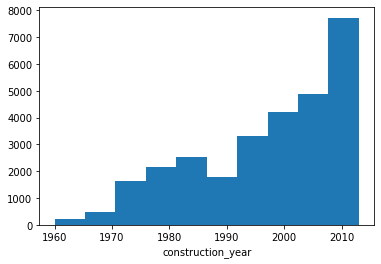

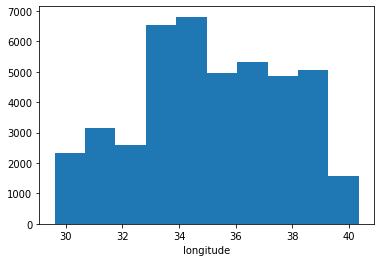

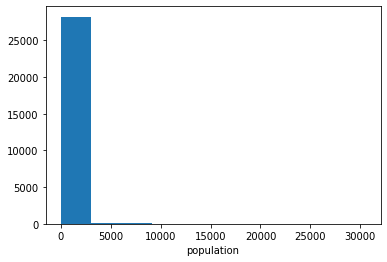

In [ ]:
for col in ["construction_year", "longitude","population"]:
  plt.figure()
  plt.hist(traindf[traindf[col]!=0][col])
  plt.xlabel(col)
  plt.show

Conclusions:

* Cannot replace 0 values in construction_year by mean, median or mode since spread is not suitable
* Longitude can take 0 values, but the spread suggests that these are essentially null values
* Population does not have good spread, will drop it

I do not want to drop construction_year, since the age of the pump is an important parameter

In [ ]:
#dropping population
traindf = traindf.drop(columns=['population'])
testdf = testdf.drop(columns=['population'])
testdf.head()

,date_recorded,gps_height,longitude,latitude,basin,construction_year,extraction_type_class,management_group,quality_group,quantity_group,source_type,waterpoint_type_group
0,2011-02-25,1676,35.247289,-8.113243,Rufiji,2004,gravity,user-group,good,dry,spring,communal standpipe
1,2011-04-17,0,36.163435,-5.218454,Wami / Ruvu,0,motorpump,user-group,good,enough,borehole,communal standpipe
2,2011-03-27,0,36.363337,-7.297600,Rufiji,0,handpump,user-group,good,enough,shallow well,hand pump
3,2011-07-14,0,31.496315,-2.167140,Lake Victoria,0,other,user-group,good,enough,shallow well,hand pump
4,2011-07-31,0,31.843905,-1.244841,Lake Victoria,0,gravity,user-group,good,insufficient,rainwater harvesting,communal standpipe


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


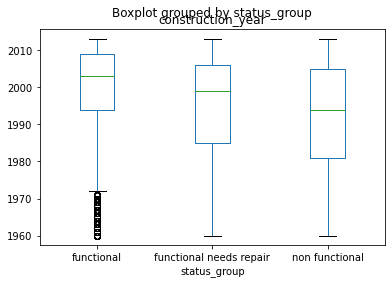

In [ ]:
traindf[traindf["construction_year"]!=0].boxplot(column='construction_year', by='status_group', grid=False)

My claim is somewhat correct. Further analysis is needed.

In [ ]:
#replacing 0 values with np.nan
traindf['construction_year'] = traindf['construction_year'].replace([0],np.nan)
testdf['construction_year'] = testdf['construction_year'].replace([0],np.nan)

traindf['gps_height'] = traindf['gps_height'].replace([0],np.nan)
testdf['gps_height'] = testdf['gps_height'].replace([0],np.nan)
traindf

,date_recorded,gps_height,longitude,latitude,basin,construction_year,extraction_type_class,management_group,quality_group,quantity_group,source_type,waterpoint_type_group,status_group
0,2013-03-20,1203.0,37.228664,-3.256505,Pangani,2008.0,gravity,user-group,good,enough,spring,communal standpipe,functional
1,2011-02-21,1409.0,34.615481,-9.972601,Lake Nyasa,1984.0,gravity,commercial,good,enough,spring,communal standpipe,functional
2,2013-01-04,1572.0,36.658778,-3.321529,Pangani,2002.0,gravity,user-group,good,insufficient,spring,communal standpipe,non functional
3,2011-04-03,NaN,33.628025,-8.860795,Rufiji,NaN,gravity,user-group,good,insufficient,river/lake,communal standpipe,functional
4,2013-03-08,1283.0,37.655509,-3.669777,Pangani,2007.0,gravity,user-group,good,insufficient,spring,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,2013-01-23,NaN,32.383715,-3.457624,Lake Tanganyika,NaN,handpump,user-group,milky,enough,shallow well,hand pump,functional
44546,2011-07-25,NaN,31.615509,-2.738682,Lake Victoria,NaN,handpump,user-group,good,enough,borehole,hand pump,non functional
44547,2013-02-23,969.0,35.134412,-10.676062,Ruvuma / Southern Coast,1977.0,gravity,user-group,good,seasonal,spring,communal standpipe,functional
44548,2013-03-26,1269.0,37.886287,-4.390882,Pangani,2011.0,gravity,user-group,good,insufficient,spring,communal standpipe,functional


I will be imputing 'construction_year' column later

In [ ]:
#Imputing longitude using mean
s=traindf[traindf['longitude']!=0]['longitude'].mean()
traindf['longitude'] = traindf['longitude'].replace([0],s)
testdf['longitude'] = testdf['longitude'].replace([0],s)

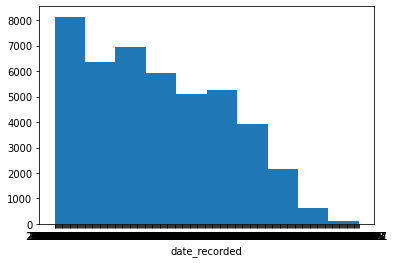

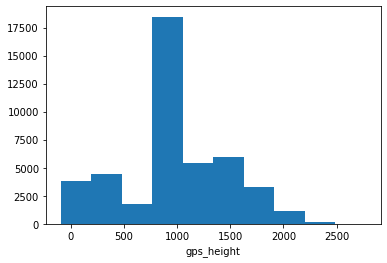

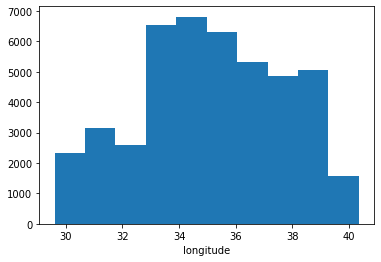

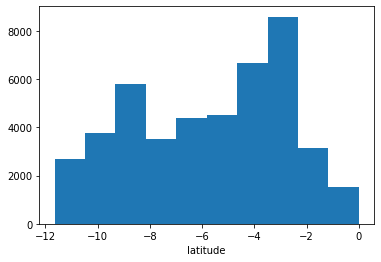

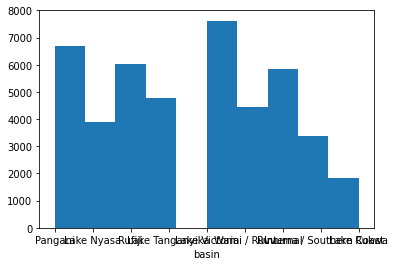

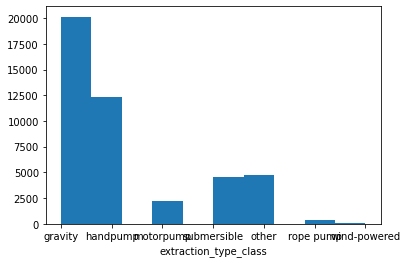

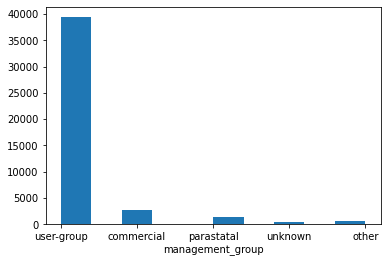

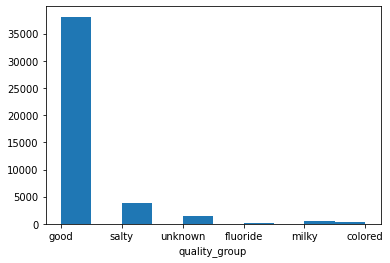

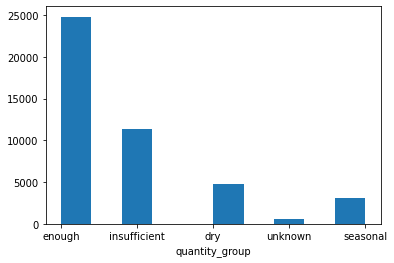

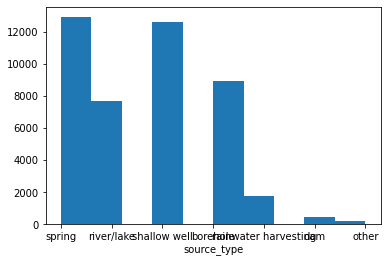

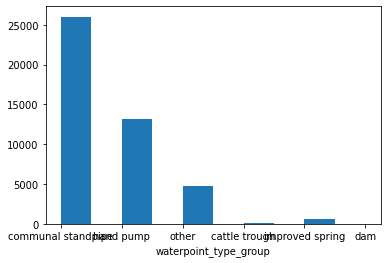

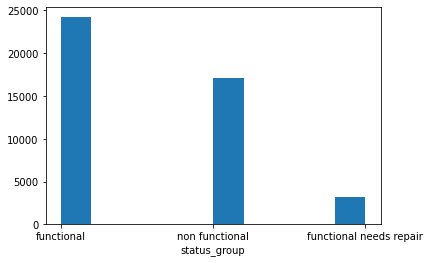

In [ ]:
#checking the spread of the data for each column
for col in traindf.columns.values:

  if(col!="construction_year"):
    plt.figure()
    plt.hist(traindf[col])
    plt.xlabel(col)
    plt.show

'management_group' and 'quantity_group' are suspected to be less relevant

In [ ]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

for col1 in ['extraction_type_class', 'management_group', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group', 'status_group']:
  for col2 in ['extraction_type_class', 'management_group', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group', 'status_group']:
    if cramers_v(traindf[col1],traindf[col2]) >=0.5 and col1!=col2:
      print('Correlation between '+str(col1)+' and '+str(col2)+' is '+str(cramers_v(traindf[col1],traindf[col2])))

Correlation between extraction_type_class and waterpoint_type_group is 0.5377827705277872
Correlation between waterpoint_type_group and extraction_type_class is 0.5377827705277873


Two conclusions:
* There is no strong correlation between any two categorical variables
* There is no strong correlation between categorical variables and target column

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

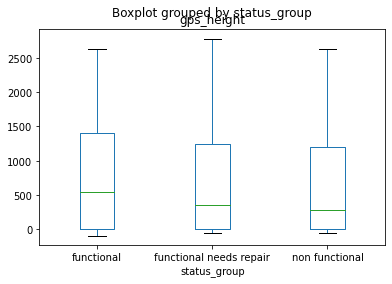

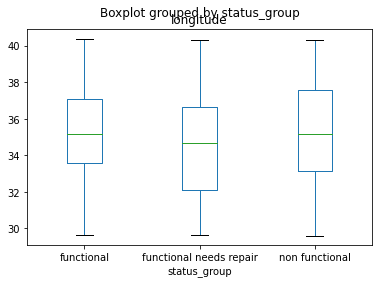

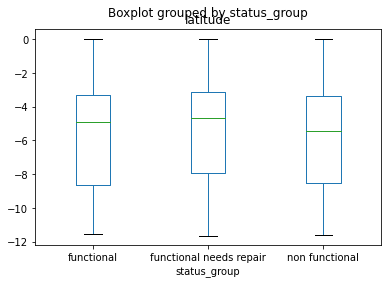

In [ ]:
#now checking for correlation (importance) of numerical columnns wrt to target variable using boxplots
for col in ['gps_height', 'longitude', 'latitude']:
  traindf.boxplot(column=col, by='status_group', grid=False)

No strong correlation

## **Variable Transformation**

In [ ]:
traindf = pd.get_dummies(traindf, columns=['basin','extraction_type_class', 'management_group', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group'])
testdf = pd.get_dummies(testdf, columns=['basin','extraction_type_class', 'management_group', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group'])
traindf

,date_recorded,gps_height,longitude,latitude,construction_year,status_group,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,2013-03-20,1203.0,37.228664,-3.256505,2008.0,functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,2011-02-21,1409.0,34.615481,-9.972601,1984.0,functional,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2013-01-04,1572.0,36.658778,-3.321529,2002.0,non functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,2011-04-03,NaN,33.628025,-8.860795,NaN,functional,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2013-03-08,1283.0,37.655509,-3.669777,2007.0,functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,2013-01-23,NaN,32.383715,-3.457624,NaN,functional,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
44546,2011-07-25,NaN,31.615509,-2.738682,NaN,non functional,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
44547,2013-02-23,969.0,35.134412,-10.676062,1977.0,functional,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
44548,2013-03-26,1269.0,37.886287,-4.390882,2011.0,functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


Now I will impute construction_year column

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(traindf.drop(columns=['date_recorded','status_group']))

X_test = traindf.drop(columns=['date_recorded','status_group'])
imp.transform(X_test)

array([[ 1.20300000e+03,  3.72286643e+01, -3.25650480e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.40900000e+03,  3.46154811e+01, -9.97260069e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.57200000e+03,  3.66587775e+01, -3.32152907e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.69000000e+02,  3.51344122e+01, -1.06760620e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.26900000e+03,  3.78862870e+01, -4.39088246e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.05255514e+02,  3.29765599e+01, -4.26214899e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
traindf['construction_year'] = np.round(imp.transform(X_test))[:,3]
traindf['gps_height'] = np.round(imp.transform(X_test))[:,0]
X_testdf = testdf.drop(columns=['date_recorded'])
testdf['construction_year'] = np.round(imp.transform(X_testdf))[:,3]
testdf['gps_height'] = np.round(imp.transform(X_testdf))[:,0]
testdf

,date_recorded,gps_height,longitude,latitude,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,2011-02-25,1676.0,35.247289,-8.113243,2004.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,2011-04-17,822.0,36.163435,-5.218454,1997.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2011-03-27,833.0,36.363337,-7.297600,2002.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2011-07-14,1849.0,31.496315,-2.167140,1993.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,2011-07-31,1999.0,31.843905,-1.244841,2001.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,2011-03-10,1811.0,34.533405,-9.781788,1988.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
14846,2011-03-18,252.0,36.665856,-8.141162,2010.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
14847,2012-11-03,666.0,33.020305,-4.949560,1994.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
14848,2013-01-18,1294.0,30.588892,-3.837622,2004.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


<function matplotlib.pyplot.show>

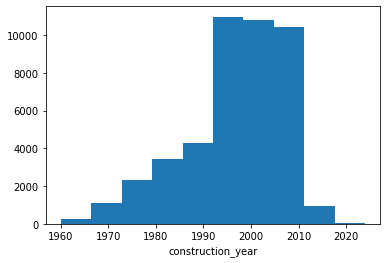

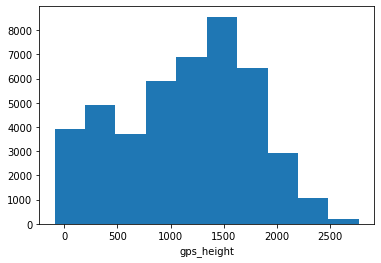

In [ ]:
#checking if spread is more or less the same
plt.figure()
plt.hist(traindf["construction_year"])
plt.xlabel("construction_year")
plt.show
plt.figure()
plt.hist(traindf["gps_height"])
plt.xlabel("gps_height")
plt.show


I'll add another column which is the age of the water pump system.

This will be done by subtracting construction year from date recorded

In [ ]:
traindf['age'] = traindf['date_recorded'].astype(str).str[0:4].astype(int) - traindf['construction_year'].astype(int)
testdf['age'] = testdf['date_recorded'].astype(str).str[0:4].astype(int) - testdf['construction_year'].astype(int)
traindf

,date_recorded,gps_height,longitude,latitude,construction_year,status_group,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,age
0,2013-03-20,1203.0,37.228664,-3.256505,2008.0,functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,5
1,2011-02-21,1409.0,34.615481,-9.972601,1984.0,functional,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,27
2,2013-01-04,1572.0,36.658778,-3.321529,2002.0,non functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,11
3,2011-04-03,1521.0,33.628025,-8.860795,1992.0,functional,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19
4,2013-03-08,1283.0,37.655509,-3.669777,2007.0,functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,2013-01-23,665.0,32.383715,-3.457624,2000.0,functional,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,13
44546,2011-07-25,2017.0,31.615509,-2.738682,1999.0,non functional,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,12
44547,2013-02-23,969.0,35.134412,-10.676062,1977.0,functional,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,36
44548,2013-03-26,1269.0,37.886287,-4.390882,2011.0,functional,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2


In [ ]:
traindf.loc[traindf['age'] < 0, 'age'] = 0
testdf.loc[testdf['age'] < 0, 'age'] = 0

<function matplotlib.pyplot.show>

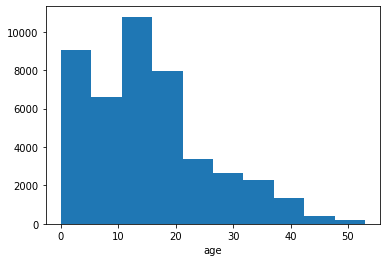

In [ ]:
#checking if spread is more or less the same
plt.figure()
plt.hist(traindf["age"])
plt.xlabel("age")
plt.show

All negative values have been replaced by 0 in both sets

In [ ]:
traindf = traindf.drop(columns=['date_recorded','construction_year'])
testdf = testdf.drop(columns=['date_recorded','construction_year'])

## **Training models**

I will start off with
### **Random Forest Classifier**

In [ ]:
traindf['status_group'] = traindf['status_group'].replace(['functional','non functional','functional needs repair'],[0,1,2])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(traindf.drop(['status_group'],axis=1), traindf['status_group'], test_size=0.15)

y_test = y_test.astype('int')
y_train = y_train.astype('int')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,15,20], 'n_estimators':[10,30,50,100]}
clfrfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters)
clfrfc.fit(x_train, y_train)

print("Best parameter choices are " + str(clfrfc.best_params_))
print("Best accuracy score is " +str(clfrfc.best_score_))

y_pred = clfrfc.predict(x_test)

print(classification_report(y_test, y_pred))

Best parameter choices are {'max_depth': 20, 'n_estimators': 100}
Best accuracy score is 0.7849051278061041
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3640
           1       0.85      0.73      0.79      2555
           2       0.47      0.24      0.32       488

    accuracy                           0.79      6683
   macro avg       0.70      0.62      0.65      6683
weighted avg       0.78      0.79      0.78      6683



Now for feature importance,

In [ ]:
rfc = RandomForestClassifier(max_depth= clfrfc.best_params_['max_depth'], n_estimators= clfrfc.best_params_['n_estimators'])
rfc.fit(x_train, y_train)

importance = rfc.feature_importances_

In [ ]:
variables = x_train.columns.values

for i in range(0,len(variables)):
  if i>=0 and i<=2:
    print("Score of column {} is {}".format(variables[i],importance[i]))
average = np.mean(importance[3:12])
print("Score of column basin is {}".format(average))
average = np.mean(importance[12:19])
print("Score of column extraction_type_class is {}".format(average))
average = np.mean(importance[12:24])
print("Score of column management_group is {}".format(average))
average = np.mean(importance[24:35])
print("Score of column quality_group is {}".format(average))
average = np.mean(importance[35:42])
print("Score of column source_type is {}".format(average))
average = np.mean(importance[42:48])
print("Score of column waterpoint_type_group is {}".format(average))
print("Score of column age is {}".format(importance[48]))

Score of column gps_height is 0.12860727708250658
Score of column longitude is 0.15370504880003855
Score of column latitude is 0.152165350279129
Score of column basin is 0.005199630512007394
Score of column extraction_type_class is 0.009759945316635236
Score of column management_group is 0.007778723026401404
Score of column quality_group is 0.017985178577702023
Score of column source_type is 0.006088819228553257
Score of column waterpoint_type_group is 0.011332804433041516
Score of column age is 0.11692544736059832


basin and source_type seem to be less important

I'll remove these and train the model again


In [ ]:
x_train = x_train.drop(columns=['basin_Internal','basin_Lake Nyasa','basin_Lake Rukwa','basin_Lake Tanganyika',
                      'basin_Lake Victoria','basin_Pangani','basin_Rufiji','basin_Ruvuma / Southern Coast','basin_Wami / Ruvu',
                      'source_type_borehole','source_type_dam','source_type_other','source_type_rainwater harvesting',
                      'source_type_river/lake','source_type_shallow well','source_type_spring'])
x_test = x_test.drop(columns=['basin_Internal','basin_Lake Nyasa','basin_Lake Rukwa','basin_Lake Tanganyika',
                      'basin_Lake Victoria','basin_Pangani','basin_Rufiji','basin_Ruvuma / Southern Coast','basin_Wami / Ruvu',
                      'source_type_borehole','source_type_dam','source_type_other','source_type_rainwater harvesting',
                      'source_type_river/lake','source_type_shallow well','source_type_spring'])


rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,15,20], 'n_estimators':[10,30,50,100]}
clfrfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters)
clfrfc.fit(x_train, y_train)

print("Best parameter choices are " + str(clfrfc.best_params_))
print("Best accuracy score is " +str(clfrfc.best_score_))

y_pred = clfrfc.predict(x_test)

print(classification_report(y_test, y_pred))

Best parameter choices are {'max_depth': 20, 'n_estimators': 100}
Best accuracy score is 0.784271363342404
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3630
           1       0.85      0.72      0.78      2559
           2       0.58      0.22      0.32       494

    accuracy                           0.79      6683
   macro avg       0.73      0.62      0.64      6683
weighted avg       0.78      0.79      0.77      6683



Feature elimination is not that beneficial in this case

One of the f1 scores is low, corresponding to 'functional needs repair' column
I will proceed with SMOTE techniques.

In [ ]:
#SMOTE Over sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

#dataset has become too large, I will train on 2/3 of the data
x_train_res, x_test_dum, y_train_res, y_test_dum = train_test_split(x_train_res, y_train_res, test_size=0.333)

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,15,20], 'n_estimators':[10,30,50,100]}
clfrfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters)
clfrfc.fit(x_train_res, y_train_res)

print("Best parameter choices are " + str(clfrfc.best_params_))
print("Best accuracy score is " +str(clfrfc.best_score_))

y_pred = clfrfc.predict(x_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Best parameter choices are {'max_depth': 20, 'n_estimators': 100}
Best accuracy score is 0.8246173599962567
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3686
           1       0.82      0.72      0.77      2521
           2       0.48      0.25      0.33       476

    accuracy                           0.78      6683
   macro avg       0.69      0.62      0.64      6683
weighted avg       0.77      0.78      0.77      6683



### **Neural Network**

Some data transformation is required first

* Target column has to be encoded differently
* Data has to be normalized for better comparison of weights

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

traindfnn = pd.get_dummies(traindf, columns=['status_group'])

x_train, x_test, y_train, y_test = train_test_split(traindfnn.drop(['status_group_0','status_group_1','status_group_2'],axis=1), 
                                                    traindfnn[['status_group_0','status_group_1','status_group_2']], test_size=0.15)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

nn = MLPClassifier(solver='lbfgs', max_iter=300)
hyperparameters = {'alpha':[1e-5, 1e-4], 'hidden_layer_sizes':[(10),(10,20),(20,10)]}
clfnn = GridSearchCV(estimator=nn, param_grid=hyperparameters)
clfnn.fit(x_train, y_train)

print("Best parameter choices are " + str(clfnn.best_params_))
print("Best accuracy score is " + str(clfnn.best_score_))

y_pred = clfnn.predict(x_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Best parameter choices are {'alpha': 0.0001, 'hidden_layer_sizes': (20, 10)}
Best accuracy score is 0.6953020283064049
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3628
           1       0.83      0.64      0.72      2579
           2       0.48      0.05      0.09       476

   micro avg       0.77      0.70      0.73      6683
   macro avg       0.69      0.51      0.53      6683
weighted avg       0.76      0.70      0.71      6683
 samples avg       0.70      0.70      0.70      6683



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Poor results for one of the classes

### **K Nearest Neighbours**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(traindf.drop(['status_group'],axis=1), traindf['status_group'], test_size=0.15)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
hyperparameters = {'n_neighbors':[3,5,7], 'weights':['uniform','distance']}
clfknn = GridSearchCV(estimator=knn, param_grid=hyperparameters)
clfknn.fit(x_train, y_train)

print("Best parameter choices are " + str(clfknn.best_params_))
print("Best accuracy score is " +str(clfknn.best_score_))

y_pred = clfknn.predict(x_test)

print(classification_report(y_test, y_pred))

Best parameter choices are {'n_neighbors': 7, 'weights': 'distance'}
Best accuracy score is 0.7675021237701476
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      3599
           1       0.79      0.74      0.76      2563
           2       0.44      0.30      0.36       521

    accuracy                           0.76      6683
   macro avg       0.67      0.63      0.64      6683
weighted avg       0.76      0.76      0.76      6683



### **Visualizing Decision Boundary**

I will consider longitude and age column for this purpose


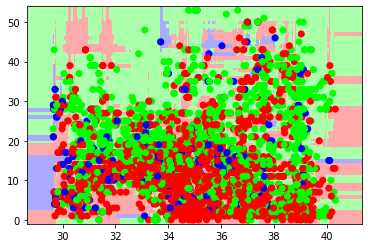

In [ ]:
#Heavily borrowed from: https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

from matplotlib.colors import ListedColormap
from sklearn import neighbors, ensemble

n_estimators = clfrfc.best_params_['n_estimators']
max_depth = clfrfc.best_params_['max_depth']

traindfvis = traindf.sample(frac = 0.1)

X = traindfvis[['longitude','age']] 
y = traindfvis['status_group']

h = .02 

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clfvis = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clfvis.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['longitude'].min() - 1, X['longitude'].max() + 1
y_min, y_max = X['age'].min() - 1, X['age'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clfvis.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['longitude'], X['age'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### **Final Output**

Using RandomForestClassifier() since it has worked best

In [ ]:
rfc = RandomForestClassifier(n_estimators=clfrfc.best_params_['n_estimators'], max_depth = clfrfc.best_params_['max_depth'])
rfc.fit(traindf.drop(columns=['status_group']), traindf['status_group'])

y_final = rfc.predict(testdf)
y_test=[]

for i in range(0,len(y_final)):
  if y_final[i]==0:
    y_test.append('functional')
  elif y_final[i]==1:
    y_test.append('non functional')
  else:
    y_test.append('functional needs repair')


In [ ]:
dict = {'labels': y_test}  
       
df = pd.DataFrame(dict) 
df.to_csv('y_test.csv', header=None, index=False)